### Loading datasets

In [1]:
import os
import pandas as pd
# Base directory where your dataset is stored
base_directory = '/kaggle/input/apt-unraveled/Week5_Day6_06272021/Week5_Day6_06272021'

# Exclude Week 1 and list CSV files from Weeks 2 to 6
csv_files = []
for root, dirs, files in os.walk(base_directory):
    for file in files:
        if file.endswith('.csv'):
            csv_files.append(os.path.join(root, file))

# Load all CSV files from relevant weeks
dataframes = [pd.read_csv(file) for file in csv_files]
combined_data = pd.concat(dataframes, ignore_index=True)


# Check label distribution for balance
signature_counts = combined_data['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = combined_data['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = combined_data['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)

Signature distribution:
Signature
APT    6148
AA     4466
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       52620
Active Scanning: Scanning IP Blocks           4462
Encrypted Channel: Symmetric Cryptography     2660
Maintain Access                               2157
Data Transfer Size Limits                     1331
Active Scanning: Vulnerability Scanning          4
Name: count, dtype: int64
Stage distribution:
Stage
Benign                52620
Reconnaissance         4466
Establish Foothold     2660
Lateral Movement       2157
Data Exfiltration      1331
Name: count, dtype: int64


In [2]:
combined_data.shape

(63234, 89)

In [3]:
combined_data.columns

Index(['id', 'expiration_id', 'src_ip', 'src_mac', 'src_oui', 'src_port',
       'dst_ip', 'dst_mac', 'dst_oui', 'dst_port', 'protocol', 'ip_version',
       'vlan_id', 'tunnel_id', 'bidirectional_first_seen_ms',
       'bidirectional_last_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_first_seen_ms',
       'src2dst_last_seen_ms', 'src2dst_duration_ms', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_last_seen_ms',
       'dst2src_duration_ms', 'dst2src_packets', 'dst2src_bytes',
       'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'bidirectional_max_ps', 'src2dst_min_ps',
       'src2dst_mean_ps', 'src2dst_stddev_ps', 'src2dst_max_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'dst2src_max_ps', 'bidirectional_min_piat_ms',
       'bidirectional_mean_piat_ms', 'bidirectional_stddev_piat_ms',
       'bidirectional_max_piat_ms', 'src2dst

In [4]:
combined_data.head()

,id,expiration_id,src_ip,src_mac,src_oui,src_port,dst_ip,dst_mac,dst_oui,dst_port,...,application_is_guessed,requested_server_name,client_fingerprint,server_fingerprint,user_agent,content_type,Activity,Stage,DefenderResponse,Signature
0,0,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,60689,8.8.8.8,fa:16:3e:b5:c4:4c,fa:16:3e,53,...,0,tile-service.weather.microsoft.com,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
1,1,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,62264,184.30.179.31,fa:16:3e:b5:c4:4c,fa:16:3e,80,...,0,tile-service.weather.microsoft.com,NaN,NaN,Microsoft-WNS/10.0,text/xml,Normal,Benign,Benign,NaN
2,2,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,46190,10.8.10.84,fa:16:3e:b5:c4:4c,fa:16:3e,443,...,1,NaN,NaN,NaN,NaN,NaN,Maintain Access,Lateral Movement,Benign,APT
3,3,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,162.159.200.1,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN
4,4,0,192.168.0.11,fa:16:3e:e6:67:36,fa:16:3e,123,50.205.244.20,fa:16:3e:b5:c4:4c,fa:16:3e,123,...,0,NaN,NaN,NaN,NaN,NaN,Normal,Benign,Benign,NaN


### Chosing Label "Signature".

In [5]:
combined_data['Signature'] = combined_data['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(combined_data['Signature'].value_counts())

Signature
Non-APT    57086
APT         6148
Name: count, dtype: int64


### Chosing FEatures from droping NaNs more then 30%

In [6]:
null_percent = combined_data.isnull().mean()

# Set the threshold for removing columns
threshold = 0.30  # 30%

# Identify columns to drop (those with more than 30% missing values)
columns_to_drop = null_percent[null_percent > threshold].index

# Drop the identified columns from the DataFrame
df_cleaned = combined_data.drop(columns=columns_to_drop)

# Check the cleaned DataFrame
print("Columns with more than 30% null values removed:")
df_cleaned.info()

Columns with more than 30% null values removed:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63234 entries, 0 to 63233
Data columns (total 84 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            63234 non-null  int64  
 1   expiration_id                 63234 non-null  int64  
 2   src_ip                        63234 non-null  object 
 3   src_mac                       63234 non-null  object 
 4   src_oui                       63234 non-null  object 
 5   src_port                      63234 non-null  int64  
 6   dst_ip                        63234 non-null  object 
 7   dst_mac                       63234 non-null  object 
 8   dst_oui                       63234 non-null  object 
 9   dst_port                      63234 non-null  int64  
 10  protocol                      63234 non-null  int64  
 11  ip_version                    63234 non-null  int64  
 12  vlan_id     

### Corellation

In [7]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame after removing null-valued columns
# Compute correlation matrix
df_cleaned_corr = df_cleaned.drop(columns=["id" ,"expiration_id","src_ip" , "src_mac" ,"src_oui", "dst_ip" , "dst_mac" , "dst_oui", "application_name" , "application_category_name" , "Activity" , "Stage" , "DefenderResponse" , "Signature"])
correlation_matrix = df_cleaned_corr.corr().abs()

# Select upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than threshold (e.g., 0.95)
threshold = 0.95
correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop correlated features
df_uncorrelated = df_cleaned_corr.drop(columns=correlated_features)

# Check the shape of the DataFrame after dropping correlated features
print("Shape of DataFrame after dropping correlated features:", df_uncorrelated.shape)

Shape of DataFrame after dropping correlated features: (63234, 54)


In [8]:
df_uncorrelated.head(5)

,src_port,dst_port,protocol,ip_version,vlan_id,tunnel_id,bidirectional_first_seen_ms,bidirectional_duration_ms,bidirectional_packets,bidirectional_bytes,...,src2dst_urg_packets,src2dst_psh_packets,src2dst_rst_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,application_is_guessed
0,60689,53,17,4,0,0,1624820683947,17,2,294,...,0,0,0,0,0,0,0,0,0,0
1,62264,80,6,4,0,0,1624820683972,60038,11,5464,...,0,1,0,0,0,0,5,2,0,0
2,46190,443,6,4,0,0,1624820685998,71,8,552,...,0,1,2,0,0,0,4,1,0,1
3,123,123,17,4,0,0,1624820862169,30,2,180,...,0,0,0,0,0,0,0,0,0,0
4,123,123,17,4,0,0,1624820755441,61713,4,360,...,0,0,0,0,0,0,0,0,0,0


### Label Encoding to targeted label.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = combined_data["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 0 ... 1 1 1]


### IP features convertion.

In [10]:
import pandas as pd
import numpy as np
import ipaddress
# import category_encoders as ce

# Sample DataFrame for demonstration
# df_cleaned = pd.read_csv('your_dataset.csv')  # Assuming you load your data this way
non_numeric_columns = ["src_ip", "src_mac", "src_oui", "dst_ip", "dst_mac",
                       "dst_oui", "application_name", "application_category_name"]

# List of non-numeric columns

# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip = df_cleaned[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip['src_ip'] = df_ip['src_ip'].apply(validate_and_convert_ip)
df_ip['dst_ip'] = df_ip['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip['src_ip'].fillna(-1, inplace=True)
df_ip['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip

/tmp/ipykernel_24/1783987800.py:31: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_24/1783987800.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

,src_ip,dst_ip
0,0.752563,0.031373
1,0.752563,0.719218
2,0.752563,0.039185
3,0.752563,0.635251
4,0.752563,0.198455
...,...,...
63229,0.039078,0.937500
63230,0.039078,0.937500
63231,0.039078,0.937500
63232,0.039078,0.937500


### Other non-numeric conversion

In [11]:
import category_encoders as ce
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ["src_mac", "src_oui", "dst_mac",
                  "dst_oui", "application_name", "application_category_name"]

# Select the non-IP non-numeric columns
df_non_numeric = df_cleaned[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y)

### All features

In [12]:
# Combine the encoded IP and non-IP columns with other numeric features
X = pd.concat([df_ip, encoded_non_ip, df_uncorrelated], axis=1)

# Check the resulting dataframe
X.head()

,src_ip,dst_ip,src_mac,src_oui,dst_mac,dst_oui,application_name,application_category_name,src_port,dst_port,...,src2dst_urg_packets,src2dst_psh_packets,src2dst_rst_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,application_is_guessed
0,0.752563,0.031373,0.884482,0.902774,0.881909,0.872252,1.000000,1.000000,60689,53,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.719218,0.884482,0.902774,0.881909,0.872252,1.000000,1.000000,62264,80,...,0,1,0,0,0,0,5,2,0,0
2,0.752563,0.039185,0.884482,0.902774,0.881909,0.872252,0.399199,0.665742,46190,443,...,0,1,2,0,0,0,4,1,0,1
3,0.752563,0.635251,0.884482,0.902774,0.881909,0.872252,1.000000,1.000000,123,123,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.198455,0.884482,0.902774,0.881909,0.872252,1.000000,1.000000,123,123,...,0,0,0,0,0,0,0,0,0,0


In [13]:
X.shape

(63234, 62)

In [14]:
X.columns

Index(['src_ip', 'dst_ip', 'src_mac', 'src_oui', 'dst_mac', 'dst_oui',
       'application_name', 'application_category_name', 'src_port', 'dst_port',
       'protocol', 'ip_version', 'vlan_id', 'tunnel_id',
       'bidirectional_first_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets',
       'bidi

### Assigning random_sample

In [15]:
random_state = 42

### Data Balancing --> Undersampling

In [16]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

under_sampling = ClusterCentroids(random_state=random_state)

X_resampled, y_resampled = under_sampling.fit_resample(X_scaled, Y)

print(pd.Series(y_resampled).value_counts())

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    6148
1    6148
Name: count, dtype: int64


In [17]:
X_resampled.head()

,src_ip,dst_ip,src_mac,src_oui,dst_mac,dst_oui,application_name,application_category_name,src_port,dst_port,...,src2dst_urg_packets,src2dst_psh_packets,src2dst_rst_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,application_is_guessed
0,1.0,0.536354,0.784951,0.0,0.692016,0.0,0.0,0.0,0.704911,0.006769,...,0.0,0.000677,0.166667,0.0,0.0,0.0,0.000956,0.000417,0.0,1.0
1,1.0,0.536354,0.784951,0.0,0.692016,0.0,0.0,0.0,0.704972,0.006769,...,0.0,0.004060,0.166667,0.0,0.0,0.0,0.003823,0.001668,0.0,0.0
2,1.0,0.536354,0.784951,0.0,0.692016,0.0,0.0,0.0,0.978985,0.006769,...,0.0,0.004060,0.166667,0.0,0.0,0.0,0.003823,0.001668,0.0,0.0
3,1.0,0.536354,0.784951,0.0,0.692016,0.0,0.0,0.0,0.704942,0.006769,...,0.0,0.000677,0.166667,0.0,0.0,0.0,0.001434,0.000417,0.0,1.0
4,1.0,0.536354,0.784951,0.0,0.692016,0.0,0.0,0.0,0.978955,0.006769,...,0.0,0.000677,0.166667,0.0,0.0,0.0,0.001195,0.000417,0.0,1.0


In [18]:
X_resampled.shape

(12296, 62)

### Training Model.

In [19]:
from keras.models import Model, load_model
from keras.layers import Input, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, Flatten, Concatenate
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score, recall_score, f1_score
import numpy as np

def create_bilstm_cnn_model(input_shape):
    # Input layer
    input_layer = Input(shape=input_shape)

    # Bi-LSTM branch
    lstm_output = LSTM(64, return_sequences=True)(input_layer)
    lstm_output = Dropout(0.5)(lstm_output)
    lstm_output = LSTM(32)(lstm_output)
    lstm_output = Dropout(0.5)(lstm_output)

    # CNN branch
    cnn_output = Conv1D(filters=64, kernel_size=3, activation='relu')(input_layer)
    cnn_output = MaxPooling1D(pool_size=2)(cnn_output)
    cnn_output = Flatten()(cnn_output)
    cnn_output = Dense(32, activation='relu')(cnn_output)
    cnn_output = Dropout(0.5)(cnn_output)

    # Combine LSTM and CNN branches
    combined = Concatenate()([lstm_output, cnn_output])
    combined = Dense(64, activation='relu')(combined)
    combined = Dropout(0.3)(combined)
    output = Dense(1, activation='sigmoid')(combined)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Reshape data
X_resampled_np = X_resampled.to_numpy()
X_resampled_np = np.expand_dims(X_resampled_np, axis=2)  # Reshape to (samples, timesteps, features)
n_samples, n_timesteps, n_features = X_resampled_np.shape

# Define cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Arrays to store results
precision_scores = []
recall_scores = []
f1_scores = []
accuracy_scores = []
histories = []
best_accuracy = 0
best_history = None

# Training and evaluation
for train_index, val_index in kf.split(X_resampled):
    X_train, X_val = X_resampled_np[train_index], X_resampled_np[val_index]
    Y_train, Y_val = y_resampled[train_index], y_resampled[val_index]

    # Create and compile the model
    model = create_bilstm_cnn_model((n_timesteps, n_features))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.summary()

    # Define the checkpoint callback to save the best model during training
    checkpoint_path = '/kaggle/working/best_model.keras'
    checkpoint = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', save_best_only=True, mode='max', save_weights_only=False)

    # Training the model
    history = model.fit(
        X_train, Y_train,
        epochs=20,
        batch_size=32,
        validation_data=(X_val, Y_val),
        callbacks=[EarlyStopping(patience=5), checkpoint]
    )
    
    histories.append(history)

    # Load the best model
    best_model = load_model(checkpoint_path)
    
    ## New added
    # Evaluate the best model on the validation data
    results = best_model.evaluate(X_val, Y_val, verbose=0)
    accuracy = results[1]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_history = history
        
    accuracy_scores.append(accuracy)
    ## New added

    # Evaluate the best model on the validation data
    # results = best_model.evaluate(X_val, Y_val, verbose=0)
    # accuracy_scores.append(results[1])

    # Predictions
    Y_pred = best_model.predict(X_val)
    Y_pred = (Y_pred > 0.5).astype(int)

    # Calculate precision, recall, and f1-score
    precision = precision_score(Y_val, Y_pred)
    recall = recall_score(Y_val, Y_pred)
    f1 = f1_score(Y_val, Y_pred)

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)




2024-06-03 17:04:27.871735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-03 17:04:27.871837: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-03 17:04:27.966652: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 62, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 60, 64)    │        256 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm (LSTM)         │ (None, 62, 64)    │     16,896 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d       │ (None, 30, 64)    │          0 │ conv1d[0][0]      │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 62, 64)    │          0 │ lstm[0][0]        │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten (Flatten)   │ (None, 1920)      │          0 │ max_pooling1d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_1 (LSTM)       │ (None, 32)        │     12,416 │ dropout[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │     61,472 │ flatten[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 32)        │          0 │ lstm_1[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_2 (Dropout) │ (None, 32)        │          0 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 64)        │          0 │ dropout_1[0][0],  │
│ (Concatenate)       │                   │            │ dropout_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 64)        │      4,160 │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_3 (Dropout) │ (None, 64)        │          0 │ dense_1[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │         65 │ dropout_3[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,265 (372.13 KB)

 Trainable params: 95,265 (372.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 11s 13ms/step - accuracy: 0.9107 - loss: 0.2610 - val_accuracy: 0.9923 - val_loss: 0.0268
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9918 - loss: 0.0290 - val_accuracy: 0.9939 - val_loss: 0.0202
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9950 - loss: 0.0196 - val_accuracy: 0.9951 - val_loss: 0.0166
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9961 - loss: 0.0136 - val_accuracy: 0.9943 - val_loss: 0.0232
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9963 - loss: 0.0154 - val_accuracy: 0.9955 - val_loss: 0.0145
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9964 - loss: 0.0107 - val_accuracy: 0.9951 - val_loss: 0.0152
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9973 - loss: 0.0093 - val_accuracy: 0.9963 - val_loss: 0.0141
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9980 - loss: 0.0077 - val_acc

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 62, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 60, 64)    │        256 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_2 (LSTM)       │ (None, 62, 64)    │     16,896 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_1     │ (None, 30, 64)    │          0 │ conv1d_1[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 62, 64)    │          0 │ lstm_2[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 1920)      │          0 │ max_pooling1d_1[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_3 (LSTM)       │ (None, 32)        │     12,416 │ dropout_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 32)        │     61,472 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_5 (Dropout) │ (None, 32)        │          0 │ lstm_3[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_6 (Dropout) │ (None, 32)        │          0 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 64)        │          0 │ dropout_5[0][0],  │
│ (Concatenate)       │                   │            │ dropout_6[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 64)        │      4,160 │ concatenate_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_7 (Dropout) │ (None, 64)        │          0 │ dense_4[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │         65 │ dropout_7[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,265 (372.13 KB)

 Trainable params: 95,265 (372.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - accuracy: 0.8810 - loss: 0.2747 - val_accuracy: 0.9976 - val_loss: 0.0093
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9903 - loss: 0.0364 - val_accuracy: 0.9984 - val_loss: 0.0041
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9941 - loss: 0.0192 - val_accuracy: 0.9996 - val_loss: 9.4015e-04
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9940 - loss: 0.0201 - val_accuracy: 0.9992 - val_loss: 0.0023
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9965 - loss: 0.0134 - val_accuracy: 0.9992 - val_loss: 0.0016
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9970 - loss: 0.0113 - val_accuracy: 0.9992 - val_loss: 0.0014
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9957 - loss: 0.0148 - val_accuracy: 1.0000 - val_loss: 4.7016e-04
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9969 - loss: 0.0097 - 

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 62, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 60, 64)    │        256 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_4 (LSTM)       │ (None, 62, 64)    │     16,896 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_2     │ (None, 30, 64)    │          0 │ conv1d_2[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_8 (Dropout) │ (None, 62, 64)    │          0 │ lstm_4[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_2 (Flatten) │ (None, 1920)      │          0 │ max_pooling1d_2[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_5 (LSTM)       │ (None, 32)        │     12,416 │ dropout_8[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 32)        │     61,472 │ flatten_2[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_9 (Dropout) │ (None, 32)        │          0 │ lstm_5[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_10          │ (None, 32)        │          0 │ dense_6[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 64)        │          0 │ dropout_9[0][0],  │
│ (Concatenate)       │                   │            │ dropout_10[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 64)        │      4,160 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_11          │ (None, 64)        │          0 │ dense_7[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_8 (Dense)     │ (None, 1)         │         65 │ dropout_11[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,265 (372.13 KB)

 Trainable params: 95,265 (372.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8954 - loss: 0.2945 - val_accuracy: 0.9919 - val_loss: 0.0257
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9940 - loss: 0.0283 - val_accuracy: 0.9951 - val_loss: 0.0166
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9921 - loss: 0.0276 - val_accuracy: 0.9947 - val_loss: 0.0182
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9958 - loss: 0.0150 - val_accuracy: 0.9972 - val_loss: 0.0107
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9960 - loss: 0.0142 - val_accuracy: 0.9967 - val_loss: 0.0114
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9967 - loss: 0.0150 - val_accuracy: 0.9976 - val_loss: 0.0096
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9968 - loss: 0.0101 - val_accuracy: 0.9980 - val_loss: 0.0106
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9951 - loss: 0.0151 - val_accu

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 62, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 60, 64)    │        256 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_6 (LSTM)       │ (None, 62, 64)    │     16,896 │ input_layer_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_3     │ (None, 30, 64)    │          0 │ conv1d_3[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_12          │ (None, 62, 64)    │          0 │ lstm_6[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_3 (Flatten) │ (None, 1920)      │          0 │ max_pooling1d_3[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_7 (LSTM)       │ (None, 32)        │     12,416 │ dropout_12[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_9 (Dense)     │ (None, 32)        │     61,472 │ flatten_3[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_13          │ (None, 32)        │          0 │ lstm_7[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_14          │ (None, 32)        │          0 │ dense_9[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 64)        │          0 │ dropout_13[0][0], │
│ (Concatenate)       │                   │            │ dropout_14[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_10 (Dense)    │ (None, 64)        │      4,160 │ concatenate_3[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 64)        │          0 │ dense_10[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_11 (Dense)    │ (None, 1)         │         65 │ dropout_15[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,265 (372.13 KB)

 Trainable params: 95,265 (372.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - accuracy: 0.8989 - loss: 0.2814 - val_accuracy: 0.9919 - val_loss: 0.0206
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9911 - loss: 0.0309 - val_accuracy: 0.9906 - val_loss: 0.0254
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9933 - loss: 0.0256 - val_accuracy: 0.9996 - val_loss: 0.0025
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9963 - loss: 0.0131 - val_accuracy: 0.9992 - val_loss: 0.0021
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9940 - loss: 0.0194 - val_accuracy: 0.9984 - val_loss: 0.0030
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9968 - loss: 0.0111 - val_accuracy: 1.0000 - val_loss: 0.0010
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9967 - loss: 0.0118 - val_accuracy: 0.9996 - val_loss: 9.2570e-04
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9948 - loss: 0.0189 - val_

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 62, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_4 (Conv1D)   │ (None, 60, 64)    │        256 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_8 (LSTM)       │ (None, 62, 64)    │     16,896 │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling1d_4     │ (None, 30, 64)    │          0 │ conv1d_4[0][0]    │
│ (MaxPooling1D)      │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_16          │ (None, 62, 64)    │          0 │ lstm_8[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_4 (Flatten) │ (None, 1920)      │          0 │ max_pooling1d_4[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_9 (LSTM)       │ (None, 32)        │     12,416 │ dropout_16[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_12 (Dense)    │ (None, 32)        │     61,472 │ flatten_4[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_17          │ (None, 32)        │          0 │ lstm_9[0][0]      │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_18          │ (None, 32)        │          0 │ dense_12[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_4       │ (None, 64)        │          0 │ dropout_17[0][0], │
│ (Concatenate)       │                   │            │ dropout_18[0][0]  │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_13 (Dense)    │ (None, 64)        │      4,160 │ concatenate_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_19          │ (None, 64)        │          0 │ dense_13[0][0]    │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_14 (Dense)    │ (None, 1)         │         65 │ dropout_19[0][0]  │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 95,265 (372.13 KB)

 Trainable params: 95,265 (372.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.8769 - loss: 0.2739 - val_accuracy: 0.9931 - val_loss: 0.0221
Epoch 2/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9940 - loss: 0.0272 - val_accuracy: 0.9931 - val_loss: 0.0246
Epoch 3/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9942 - loss: 0.0203 - val_accuracy: 0.9976 - val_loss: 0.0094
Epoch 4/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9962 - loss: 0.0149 - val_accuracy: 0.9980 - val_loss: 0.0061
Epoch 5/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9966 - loss: 0.0136 - val_accuracy: 0.9976 - val_loss: 0.0065
Epoch 6/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9972 - loss: 0.0120 - val_accuracy: 0.9984 - val_loss: 0.0048
Epoch 7/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9973 - loss: 0.0101 - val_accuracy: 0.9980 - val_loss: 0.0042
Epoch 8/20
308/308 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9971 - loss: 0.0094 - val_accu

### Calculate and print average results

In [20]:
# Calculate mean metrics across all folds
mean_accuracy = np.mean(accuracy_scores)
mean_precision = np.mean(precision_scores)
mean_recall = np.mean(recall_scores)
mean_f1_score = np.mean(f1_scores)

# Print the results
print(f'Mean Accuracy: {mean_accuracy:.4f}')
print(f'Mean Precision: {mean_precision:.4f}')
print(f'Mean Recall: {mean_recall:.4f}')
print(f'Mean F1-Score: {mean_f1_score:.4f}')

# Save the best model for future use
final_model_path = '/kaggle/working/final_best_model.keras'
best_model.save(final_model_path)

Mean Accuracy: 0.9992
Mean Precision: 0.9989
Mean Recall: 0.9995
Mean F1-Score: 0.9992


### Model Architecture

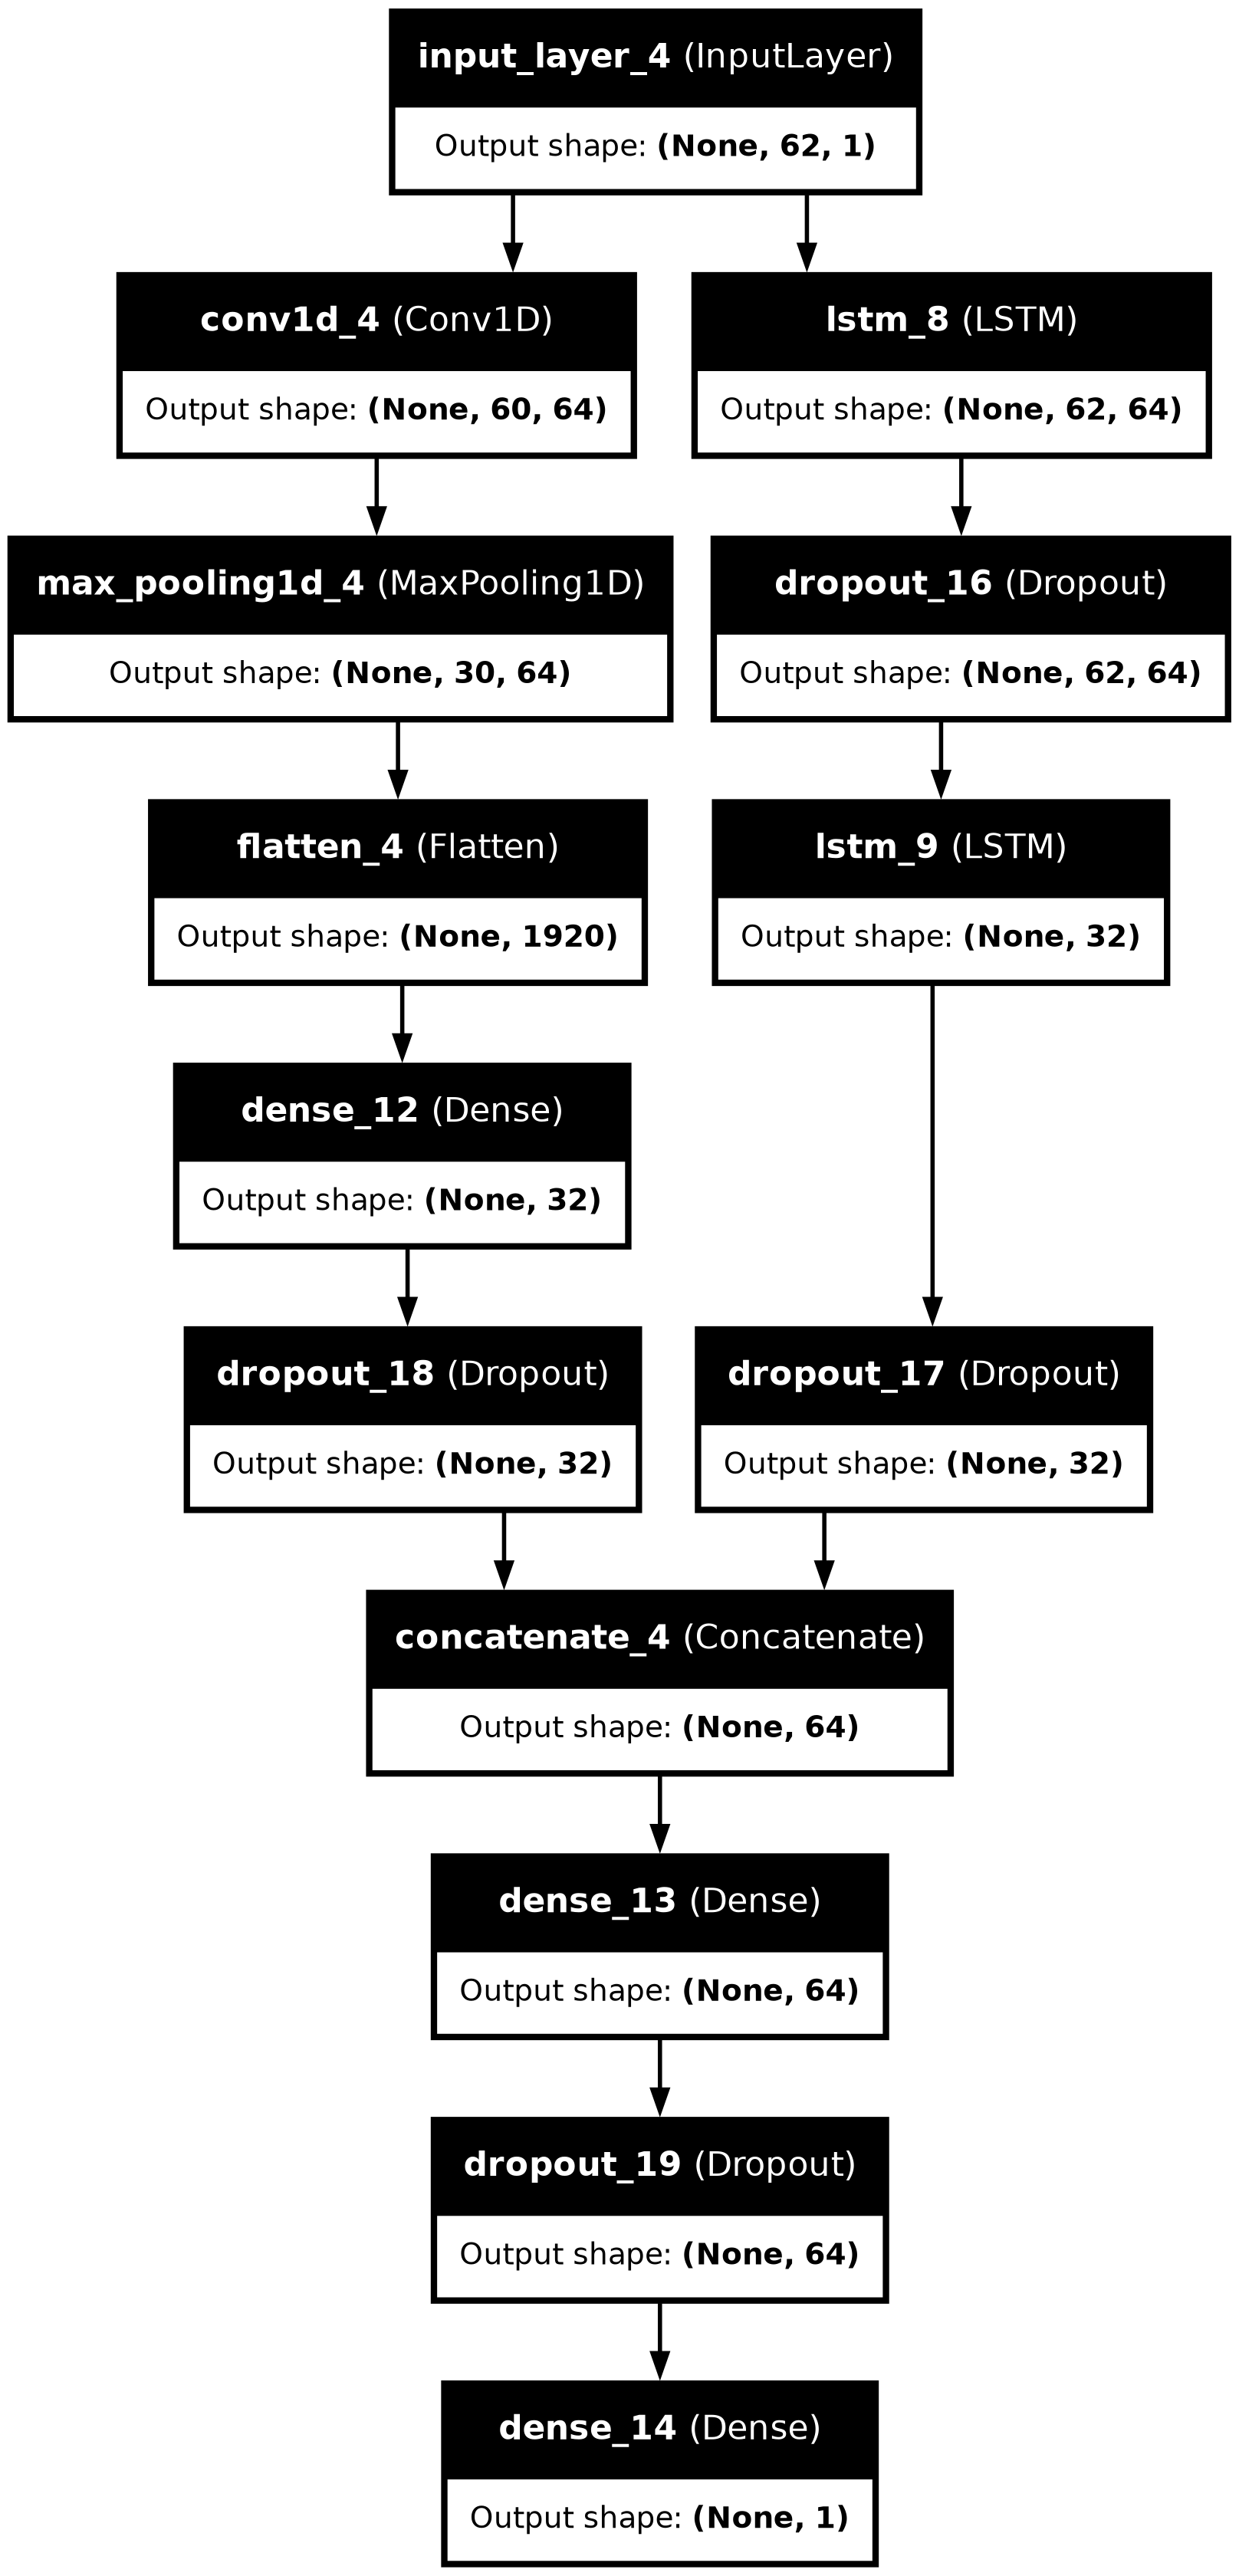

In [21]:
from keras.utils import plot_model
# Visualize the model architecture
plot_model(best_model, to_file='/kaggle/working/model_architecture.png', show_shapes=True, show_layer_names=True)

### Visualizing Training History

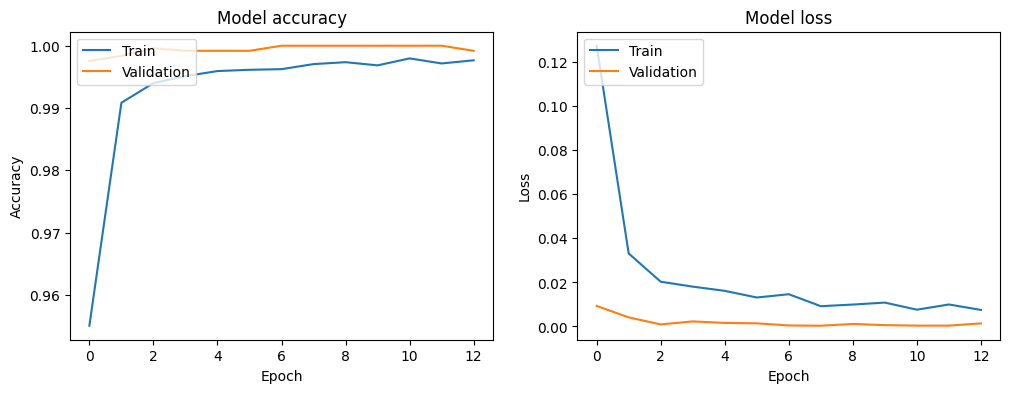

In [22]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy and loss for the best model
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(best_history.history['accuracy'])
plt.plot(best_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(best_history.history['loss'])
plt.plot(best_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


### Done with training with Bi-LSTM

# Prediction begins

### Importing test dataset

In [23]:
# Base directory where your dataset is stored
dataframe = pd.read_csv('/kaggle/input/test-apt-unraveled/netgw_Flow_labeled_w5_d4.csv')



# Check label distribution for balance
signature_counts = dataframe['Signature'].value_counts()
print("Signature distribution:")
print(signature_counts)

activity_counts = dataframe['Activity'].value_counts()
print("Activity distribution:")
print(activity_counts)

stage_counts = dataframe['Stage'].value_counts()
print("Stage distribution:")
print(stage_counts)


Signature distribution:
Signature
APT    2921
Name: count, dtype: int64
Activity distribution:
Activity
Normal                                       32934
Maintain Access                               2914
Encrypted Channel: Symmetric Cryptography        7
Name: count, dtype: int64
Stage distribution:
Stage
Benign                32934
Lateral Movement       2914
Establish Foothold        7
Name: count, dtype: int64


### Data Shape

In [24]:
dataframe.shape

(35855, 89)

In [25]:
dataframe['Signature'] = dataframe['Signature'].apply(lambda x: 'APT' if x == 'APT' else 'Non-APT')

# Check the distribution of the new label
print(dataframe['Signature'].value_counts())

Signature
Non-APT    32934
APT         2921
Name: count, dtype: int64


### Signature test encoding

In [26]:
from sklearn.preprocessing import LabelEncoder

# Sample target classes
target_classes = dataframe["Signature"].values

# Initialize LabelEncoder
encoder = LabelEncoder()

# Fit and transform the target classes
Y_pred = encoder.fit_transform(target_classes)

# Display the encoded target classes
print("Encoded target classes:")
for class_name, encoded_class in zip(encoder.classes_, range(len(encoder.classes_))):
    print(f"{class_name}: {encoded_class}")

# Check the transformed target classes
print("Transformed target classes:")
print(Y_pred)

Encoded target classes:
APT: 0
Non-APT: 1
Transformed target classes:
[1 1 1 ... 0 1 1]


### selecting uncorrelated data

In [27]:
uncorrelated_test = dataframe[['src_port', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets',
       'bidirectional_cwr_packets', 'bidirectional_ece_packets',
       'bidirectional_urg_packets', 'bidirectional_ack_packets',
       'bidirectional_psh_packets', 'bidirectional_rst_packets',
       'bidirectional_fin_packets', 'src2dst_cwr_packets',
       'src2dst_ece_packets', 'src2dst_urg_packets', 'src2dst_psh_packets',
       'src2dst_rst_packets', 'dst2src_cwr_packets', 'dst2src_ece_packets',
       'dst2src_urg_packets', 'dst2src_ack_packets', 'dst2src_psh_packets',
       'dst2src_rst_packets', 'application_is_guessed']]

uncorrelated_test.columns

Index(['src_port', 'dst_port', 'protocol', 'ip_version', 'vlan_id',
       'tunnel_id', 'bidirectional_first_seen_ms', 'bidirectional_duration_ms',
       'bidirectional_packets', 'bidirectional_bytes', 'src2dst_packets',
       'src2dst_bytes', 'dst2src_first_seen_ms', 'dst2src_duration_ms',
       'dst2src_packets', 'bidirectional_min_ps', 'bidirectional_mean_ps',
       'bidirectional_stddev_ps', 'src2dst_mean_ps', 'src2dst_stddev_ps',
       'dst2src_min_ps', 'dst2src_mean_ps', 'dst2src_stddev_ps',
       'bidirectional_min_piat_ms', 'bidirectional_mean_piat_ms',
       'bidirectional_stddev_piat_ms', 'bidirectional_max_piat_ms',
       'src2dst_min_piat_ms', 'src2dst_mean_piat_ms', 'src2dst_stddev_piat_ms',
       'dst2src_min_piat_ms', 'dst2src_mean_piat_ms', 'dst2src_stddev_piat_ms',
       'dst2src_max_piat_ms', 'bidirectional_syn_packets',
       'bidirectional_cwr_packets', 'bidirectional_ece_packets',
       'bidirectional_urg_packets', 'bidirectional_ack_packets',
       'b

In [28]:
type(uncorrelated_test)
uncorrelated_test.shape

(35855, 54)

### working on IP

In [29]:
# Function to validate and convert IP to integer
def validate_and_convert_ip(ip):
    try:
        # Check if it's a valid IPv4 address
        ip = ipaddress.IPv4Address(ip)
        return int(ip) / (2**32 - 1)  # Normalize to the range [0, 1]
    except:
        # Handle both IPv6 and invalid addresses by returning NaN
        return np.nan

# Create a copy of the IP-related columns to avoid modifying the original DataFrame
df_ip_pred = dataframe[["src_ip", "dst_ip"]].copy()

# Apply the function to IP columns
df_ip_pred['src_ip'] = df_ip_pred['src_ip'].apply(validate_and_convert_ip)
df_ip_pred['dst_ip'] = df_ip_pred['dst_ip'].apply(validate_and_convert_ip)

# Handle NaN values that may have resulted from invalid IPs
df_ip_pred['src_ip'].fillna(-1, inplace=True)
df_ip_pred ['dst_ip'].fillna(-1, inplace=True)

# Combine df_ip back with the other non-numeric columns for encoding
df_non_numeric = df_cleaned[non_numeric_columns].copy()
df_combined = pd.concat([df_ip, df_non_numeric], axis=1)



# Check the resulting dataframe
df_ip_pred 

/tmp/ipykernel_24/2628416595.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_ip_pred['src_ip'].fillna(-1, inplace=True)
/tmp/ipykernel_24/2628416595.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

,src_ip,dst_ip
0,0.752563,0.151935
1,0.752563,0.635251
2,0.752563,0.675187
3,0.752563,0.031373
4,0.752563,0.635251
...,...,...
35850,0.752563,0.031372
35851,0.752563,0.390952
35852,0.752563,0.039185
35853,0.752563,0.031373


### for non-IP

In [30]:
# Create a DataFrame for non-numeric columns excluding IPs
non_ip_columns = ["src_mac", "src_oui", "dst_mac",
                  "dst_oui", "application_name", "application_category_name"]

# Select the non-IP non-numeric columns
df_non_numeric = dataframe[non_ip_columns].copy()

# Initialize the target encoder
target_encoder = ce.TargetEncoder(cols=non_ip_columns)

# Assuming Y is your target variable
# Y = df_cleaned['target_variable']

# Fit and transform the data
encoded_non_ip = target_encoder.fit_transform(df_non_numeric, Y_pred)

### Predicted data prepare

In [31]:
# Combine the encoded IP and non-IP columns with other numeric features
X_pred = pd.concat([df_ip_pred , encoded_non_ip, uncorrelated_test], axis=1)

# Check the resulting dataframe
X_pred.head()

,src_ip,dst_ip,src_mac,src_oui,dst_mac,dst_oui,application_name,application_category_name,src_port,dst_port,...,src2dst_urg_packets,src2dst_psh_packets,src2dst_rst_packets,dst2src_cwr_packets,dst2src_ece_packets,dst2src_urg_packets,dst2src_ack_packets,dst2src_psh_packets,dst2src_rst_packets,application_is_guessed
0,0.752563,0.151935,0.909077,0.918533,0.906674,0.906722,1.000000,1.000000,123,123,...,0,0,0,0,0,0,0,0,0,0
1,0.752563,0.635251,0.909077,0.918533,0.906674,0.906722,1.000000,1.000000,123,123,...,0,0,0,0,0,0,0,0,0,0
2,0.752563,0.675187,0.909077,0.918533,0.906674,0.906722,0.998535,0.699578,55810,443,...,0,0,0,0,0,0,3,1,0,1
3,0.752563,0.031373,0.909077,0.918533,0.906674,0.906722,1.000000,1.000000,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.752563,0.635251,0.909077,0.918533,0.906674,0.906722,1.000000,1.000000,123,123,...,0,0,0,0,0,0,0,0,0,0


In [32]:
X_pred.shape

(35855, 62)

### Scaling data.

In [33]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import ClusterCentroids

scaler = MinMaxScaler()
X_pred = pd.DataFrame(scaler.fit_transform(X_pred), columns=X_pred.columns)

under_sampling = ClusterCentroids(random_state=random_state)

X_resampled_pred, Y_resampled_pred = under_sampling.fit_resample(X_pred, Y_pred)

print(pd.Series(Y_resampled_pred).value_counts())
X_pred.shape

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0    2921
1    2921
Name: count, dtype: int64


(35855, 62)

### Reshaping for LSTM

In [34]:
import numpy as np


X_pred_lstm = X_resampled_pred.to_numpy()
X_pred_lstm = np.expand_dims(X_pred_lstm, axis=2) 

# Display the new shapes
print(f"Training set reshaped for LSTM: {X_resampled_pred.shape}")

Training set reshaped for LSTM: (5842, 62)


### Predictions

In [35]:
# Make predictions
Y_pred_lstm = best_model.predict(X_pred_lstm)

# Convert probabilities to binary labels
Y_pred_binary = (Y_pred_lstm > 0.5).astype(int)

# Display the predictions
print(Y_pred_binary)


183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


### Evaluation

Accuracy: 0.9988
Precision: 0.9986
Recall: 0.9990
F1-Score: 0.9988
Confusion Matrix:
[[2917    4]
 [   3 2918]]


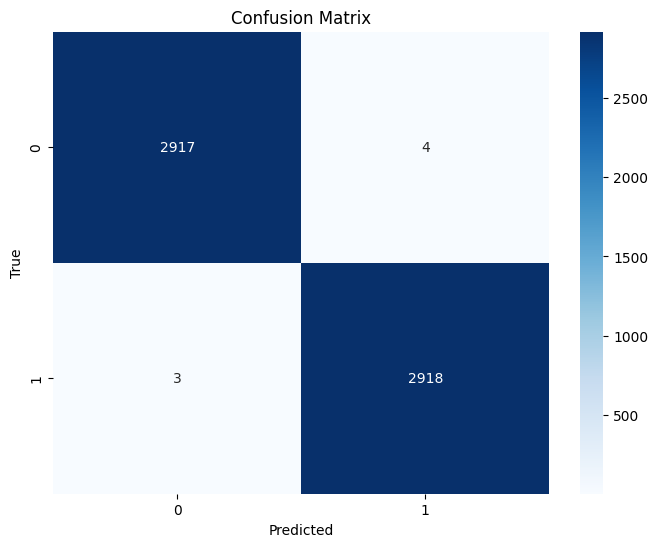

In [36]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Assuming 'y_test' contains the true labels for the test data
# Ensure y_test is available; it should be the labels of your test dataset

# 1. Make Predictions
# Y_pred_lstm = model.predict(X_pred_lstm)
# Y_predicted_classes = (Y_pred_lstm > 0.5).astype(int).flatten()

# 2. Calculate Evaluation Metrics
accuracy = accuracy_score(Y_resampled_pred, Y_pred_binary )
precision = precision_score(Y_resampled_pred, Y_pred_binary )
recall = recall_score(Y_resampled_pred, Y_pred_binary )
f1 = f1_score(Y_resampled_pred, Y_pred_binary )
conf_matrix = confusion_matrix(Y_resampled_pred, Y_pred_binary )

# 3. Print Evaluation Metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

# Optional: Plot the confusion matrix for better visualization
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
